In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pickle
from sklearn.metrics import mean_squared_error

In [4]:
#data = pd.read_csv(r"E:\CDAC\Project\Pune.csv")
#from google.colab import drive
#drive.mount('/content/drive')
# Load the file from Google Drive
#data = pd.read_csv("/content/drive/MyDrive/Datasets - Colab/Pune.csv")
data=pd.read_csv('/kaggle/input/pune-temp/Pune.csv')

In [5]:
#checking columns
data.columns

Index(['Date', 'T2M'], dtype='object')

In [6]:
# convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d%H')

# print the resulting DataFrame
print(data)

                      Date    T2M
0      2004-01-01 05:00:00  15.16
1      2004-01-01 06:00:00  14.92
2      2004-01-01 07:00:00  16.80
3      2004-01-01 08:00:00  20.33
4      2004-01-01 09:00:00  24.30
...                    ...    ...
175315 2019-01-01 00:00:00  12.52
175316 2019-01-01 01:00:00  11.83
175317 2019-01-01 02:00:00  11.27
175318 2019-01-01 03:00:00  10.89
175319 2019-01-01 04:00:00  10.62

[175320 rows x 2 columns]


In [7]:
data.index = data['Date']

In [8]:
data=data.sort_index()

In [9]:
data.head(20)

,Date,T2M
Date,,
2004-01-01 05:00:00,2004-01-01 05:00:00,15.16
2004-01-01 06:00:00,2004-01-01 06:00:00,14.92
2004-01-01 07:00:00,2004-01-01 07:00:00,16.80
2004-01-01 08:00:00,2004-01-01 08:00:00,20.33
2004-01-01 09:00:00,2004-01-01 09:00:00,24.30
2004-01-01 10:00:00,2004-01-01 10:00:00,26.87
2004-01-01 11:00:00,2004-01-01 11:00:00,28.16
2004-01-01 12:00:00,2004-01-01 12:00:00,29.01
2004-01-01 13:00:00,2004-01-01 13:00:00,29.35


In [49]:
#Dropping the first 19 rows from the main DataFrame as it is incomplete for that particular day
#data=data.iloc[19:]

In [50]:
data.count()

Date    175320
T2M     175320
dtype: int64

In [32]:
data.head()

,Date,T2M
Date,,
2004-01-02 00:00:00,2004-01-02 00:00:00,13.28
2004-01-02 01:00:00,2004-01-02 01:00:00,12.80
2004-01-02 02:00:00,2004-01-02 02:00:00,12.32
2004-01-02 03:00:00,2004-01-02 03:00:00,11.85
2004-01-02 04:00:00,2004-01-02 04:00:00,11.42


In [35]:
data.tail()

,Date,T2M
Date,,
2019-01-01 00:00:00,2019-01-01 00:00:00,12.52
2019-01-01 01:00:00,2019-01-01 01:00:00,11.83
2019-01-01 02:00:00,2019-01-01 02:00:00,11.27
2019-01-01 03:00:00,2019-01-01 03:00:00,10.89
2019-01-01 04:00:00,2019-01-01 04:00:00,10.62


In [51]:
# Drop the last 5 rows from the main DataFrame as it is incomplete for that particular day
#data = data.iloc[:-5]

In [52]:
data.tail()

,Date,T2M
Date,,
2024-01-01 00:00:00,2024-01-01 00:00:00,17.14
2024-01-01 01:00:00,2024-01-01 01:00:00,16.58
2024-01-01 02:00:00,2024-01-01 02:00:00,15.99
2024-01-01 03:00:00,2024-01-01 03:00:00,15.30
2024-01-01 04:00:00,2024-01-01 04:00:00,14.69


In [38]:
data.head()

,Date,T2M
Date,,
2004-01-02 00:00:00,2004-01-02 00:00:00,13.28
2004-01-02 01:00:00,2004-01-02 01:00:00,12.80
2004-01-02 02:00:00,2004-01-02 02:00:00,12.32
2004-01-02 03:00:00,2004-01-02 03:00:00,11.85
2004-01-02 04:00:00,2004-01-02 04:00:00,11.42


In [ ]:
#data=data.sort_index()

In [47]:
#print(data)
#data.to_csv("/content/drive/MyDrive/Datasets - Colab/checking.csv", index=True)

In [10]:
#Renaming columns
data.rename(columns={'T2M': 'TEMP'}, inplace=True)

In [11]:
data.count()

Date    175320
TEMP    175320
dtype: int64

In [12]:
# Splitting data into train and test sets
train_data = data[:-120]  # Use all data except the last 48 hours for training
test_data = data[-120:]   # Use the last 48 hours for testing

In [13]:
# SARIMA model parameters
order = (1, 1, 1)  # ARIMA parameters (p, d, q)
seasonal_order = (1, 1, 1, 24)  # SARIMA parameters (P, D, Q, S)

In [ ]:
check=train_data[:8760] #1 year data
test=train_data[8760:8808] #2 days = 48 hours

In [ ]:
# Fit SARIMA model
pune_model = SARIMAX(check["TEMP"], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False, dates=check["Date"])
pune_result = pune_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.

  self._init_dates(dates, freq)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.

  self._init_dates(dates, freq)


In [ ]:
# Forecast temperatures for the next 48 hours
forecast = pune_result.get_forecast(steps=48)

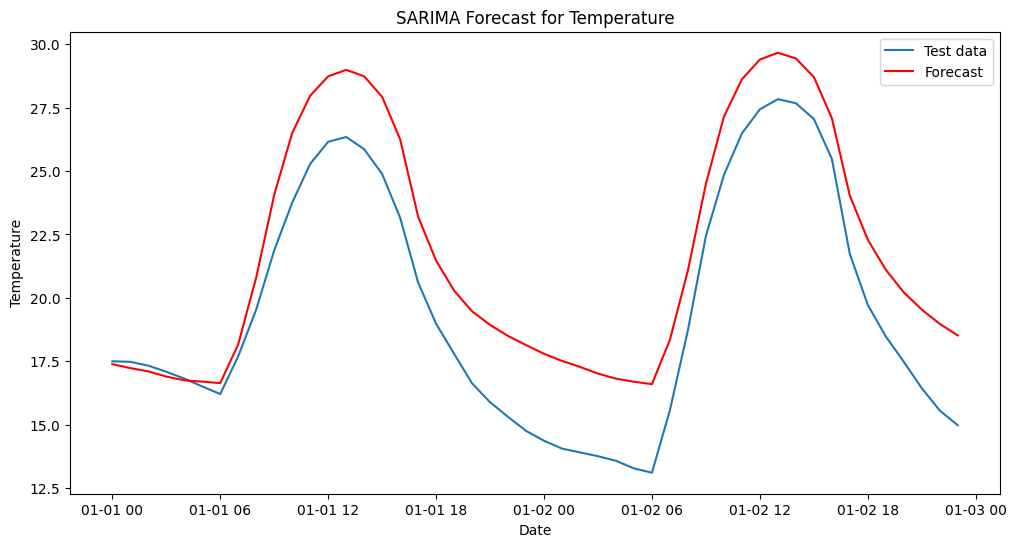

In [ ]:
# Plot the predicted values along with the actual values
plt.figure(figsize=(12, 6))
#plt.plot(check.index, check["TEMP"], label='Train data')
plt.plot(test.index, test["TEMP"], label='Test data')
plt.plot(forecast.predicted_mean, label='Forecast', color='red')
#plt.plot(forecast.index, forecast.predicted_mean, label='Forecast', color='red')
#plt.fill_between(forecast.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.5)
plt.title('SARIMA Forecast for Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test["TEMP"], forecast.predicted_mean))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 2.5143984615509867


In [ ]:
#saving pickle file of model
with open("/content/drive/MyDrive/Datasets - Colab/pune_model.pkl", 'wb') as f:
    pickle.dump(pune_result, f)

In [14]:
# Load the saved SARIMA model from the file
with open("/kaggle/input/models/pune_model.pkl", 'rb') as f:
    pune_result = pickle.load(f)

In [ ]:
# Load the saved SARIMA model from the file
with open("/content/drive/MyDrive/Datasets - Colab/pune_model.pkl", 'rb') as f:
    pune_result = pickle.load(f)

In [15]:
table=[8760*x for x in range(1, 21)]
table

[8760,
 17520,
 26280,
 35040,
 43800,
 52560,
 61320,
 70080,
 78840,
 87600,
 96360,
 105120,
 113880,
 122640,
 131400,
 140160,
 148920,
 157680,
 166440,
 175200]

In [34]:
i=20
check2=train_data[table[i-2]+19:table[i-1]+19]
test2=train_data[table[i-1]+19:table[i-1]+67] #2 days = 48 hours
print("training now: ", i)

training now:  20


In [35]:
pune_result=pune_result.extend(check2["TEMP"])

In [36]:
with open("/kaggle/working/pune_model.pkl", 'wb') as f:
    pickle.dump(pune_result, f)

In [37]:
# Forecast temperatures for the next 48 hours
forecast2 = pune_result.get_forecast(steps=48)

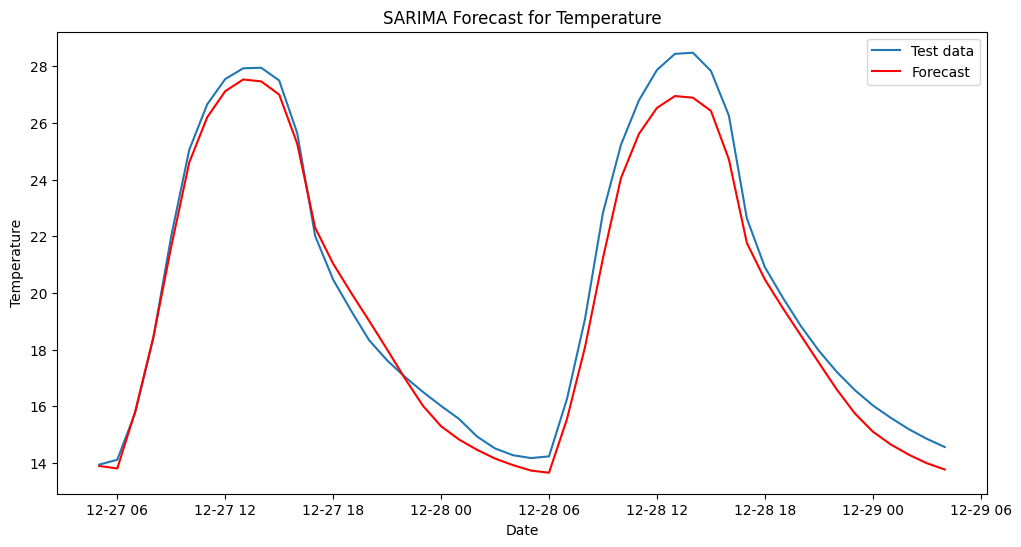

In [40]:
# Plot the predicted values along with the actual values
plt.figure(figsize=(12, 6))
#plt.plot(check.index, check["TEMP"], label='Train data')
plt.plot(test_data[:48].index, test_data[:48]["TEMP"], label='Test data')
plt.plot(forecast2.predicted_mean, label='Forecast', color='red')
#plt.plot(forecast.index, forecast.predicted_mean, label='Forecast', color='red')
#plt.fill_between(forecast.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.5)
plt.title('SARIMA Forecast for Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [41]:
rmse = np.sqrt(mean_squared_error(test_data[:48]["TEMP"], forecast2.predicted_mean))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 0.7827558063990956


In [ ]:
# Plot the predicted values along with the actual values
plt.figure(figsize=(12, 6))
#plt.plot(check.index, check["TEMP"], label='Train data')
plt.plot(check2.index, check2["TEMP"], label='Test data')
#plt.plot(forecast2.predicted_mean, label='Forecast', color='red')
#plt.plot(forecast.index, forecast.predicted_mean, label='Forecast', color='red')
#plt.fill_between(forecast.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.5)
plt.title('SARIMA Forecast for Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()